In [21]:
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
testDR = 'images/test'
trainDR = 'images/train'

In [7]:
def createdDF(dir):
    imgPath = []
    labels = []
    for label in os.listdir(dir):
        for imgName in os.listdir(os.path.join(dir,label)):
            imgPath.append(os.path.join(dir,label,imgName))
            labels.append(label)
        print(label, "completed")
    return imgPath,labels

In [8]:
train = pd.DataFrame()
train['image'], train['label'] = createdDF(trainDR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
print(train)

                                             image     label
0         images/train\angry\Training_10118481.jpg     angry
1         images/train\angry\Training_10120469.jpg     angry
2         images/train\angry\Training_10131352.jpg     angry
3         images/train\angry\Training_10161559.jpg     angry
4          images/train\angry\Training_1021836.jpg     angry
...                                            ...       ...
28704  images/train\surprise\Training_99916297.jpg  surprise
28705  images/train\surprise\Training_99924420.jpg  surprise
28706  images/train\surprise\Training_99937001.jpg  surprise
28707  images/train\surprise\Training_99951755.jpg  surprise
28708  images/train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [10]:
test = pd.DataFrame()
test['image'], test['label'] = createdDF(testDR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [17]:
def features(img):
    featuresData = []
    for image in tqdm(img):
        imgs = load_img(image,grayscale =  True )
        imgs = np.array(imgs)
        featuresData.append(imgs)
    featuresData = np.array(featuresData)
    featuresData = featuresData.reshape(len(featuresData),48,48,1)
    return featuresData

In [18]:
trainFeatures = features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

In [19]:
testFeatures = features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [20]:
xTrain = trainFeatures/255.0
xTest = testFeatures/255.0

In [22]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['label'])

LabelEncoder()

In [23]:
yTrain = labelEncoder.transform(train['label'])
yTest = labelEncoder.transform(test['label'])

In [25]:
yTrain = to_categorical(yTrain,num_classes = 7)
yTest = to_categorical(yTest,num_classes = 7)

In [39]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # Output layer with 7 classes for emotions

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

In [40]:
# Train the model
model.fit(xTrain, yTrain, epochs=100, batch_size=128, validation_data = (xTest,yTest))

Epoch 1/100
225/225 [==============================] - 31s 135ms/step - loss: 1.7607 - accuracy: 0.2860 - val_loss: 1.6071 - val_accuracy: 0.3608
Epoch 2/100
225/225 [==============================] - 30s 133ms/step - loss: 1.5620 - accuracy: 0.3971 - val_loss: 1.4594 - val_accuracy: 0.4440
Epoch 3/100
225/225 [==============================] - 40s 177ms/step - loss: 1.4484 - accuracy: 0.4492 - val_loss: 1.3597 - val_accuracy: 0.4815
Epoch 4/100
225/225 [==============================] - 43s 193ms/step - loss: 1.3696 - accuracy: 0.4802 - val_loss: 1.3133 - val_accuracy: 0.5043
Epoch 5/100
225/225 [==============================] - 48s 212ms/step - loss: 1.3169 - accuracy: 0.5014 - val_loss: 1.3301 - val_accuracy: 0.4830
Epoch 6/100
225/225 [==============================] - 44s 198ms/step - loss: 1.2727 - accuracy: 0.5183 - val_loss: 1.2454 - val_accuracy: 0.5180
Epoch 7/100
225/225 [==============================] - 44s 197ms/step - loss: 1.2288 - accuracy: 0.5359 - val_loss: 1.2270 -

In [41]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("facial_expression_model_architecture.json", "w") as json_file:
    json_file.write(model_json)
model.save("facial_expression_model_architecture.h5")

In [42]:
from keras.models import model_from_json, load_model

json_file = open("facial_expression_model_architecture.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facial_expression_model_architecture.h5")

In [43]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [44]:
def ef(image):
    img = load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

image = 'images/train/sad/Training_120178.jpg'
print("Original image is of sad")
img = ef(image)

# Print the loaded image for debugging
print("Loaded image shape:", img.shape)

# Print some statistics about the image data
print("Image data statistics - min:", np.min(img), " max:", np.max(img), " mean:", np.mean(img))

pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)


Original image is of sad
Loaded image shape: (1, 48, 48, 1)
Image data statistics - min: 0.00784313725490196  max: 0.8509803921568627  mean: 0.5114293981481481
1/1 [==============================] - 0s 51ms/step
Model prediction is sad


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 18ms/step
model prediction is  sad


C:\Users\sayyadaaisha.mehvish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


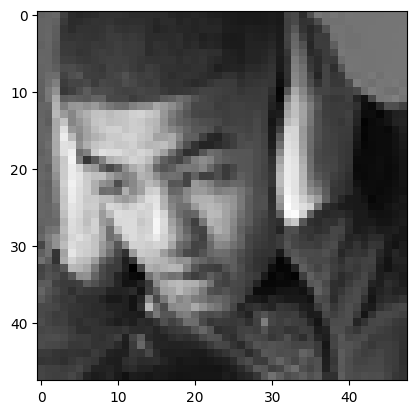

In [46]:
image = 'images/train/sad/Training_99768163.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 22ms/step
model prediction is  fear


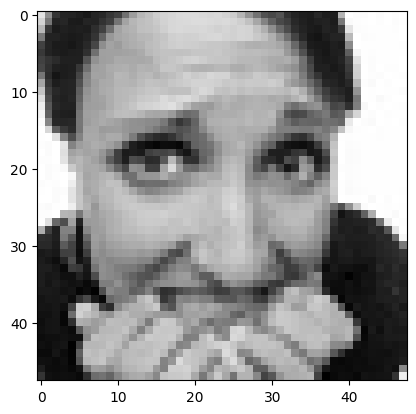

In [47]:
image = 'images/train/fear/Training_282505.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')